In [1]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx


In [3]:
df=pd.read_csv('emotion_dataset_raw.csv')
df.sample(10)

,Emotion,Text
33907,joy,"On my birthday, this happened: Oslo was covere..."
2646,sadness,"@JordynneDeAnn i should have taken spanish, bu..."
3192,anger,One of my friends asked me to go shopping with...
3167,joy,Test. Class. Then Comics.
9640,fear,Just get over here !
42,fear,Few years ago my father was very ill. He staye...
13640,joy,BIG GAME TODAY !!!! lol.
29573,joy,Waking up to annoying crows outside my house!
30578,fear,When I had to give a speech about some histori...
31778,fear,*PRIE POUR QUE LE BUS ARRIVE PLUS VITE À COMME...


In [4]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [5]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

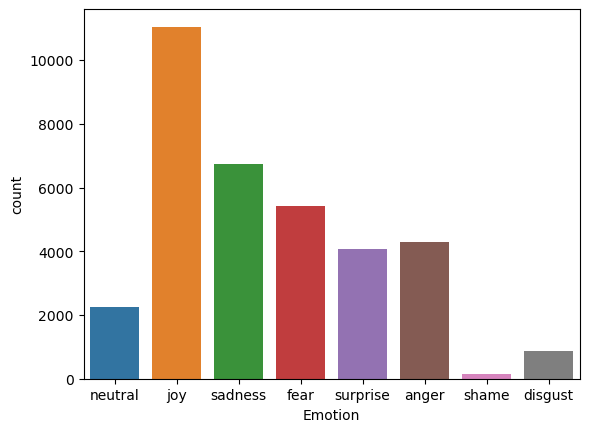

In [6]:
sns.countplot(x='Emotion',data=df)

In [7]:
#we only need Anger,joy,natural and sadness

df = df[~df['Emotion'].isin(['fear', 'surprise', 'shame', 'disgust'])]

In [8]:
df['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'anger'], dtype=object)

In [9]:
# Create a mapping dictionary based on the 'label' column for renaming
mapping = {'anger': 'Anger', 'neutral': 'Calmness', 'joy': 'Happiness', 'sadness': 'Sadness'}

# Rename the columns using the mapping dictionary
df["Emotion"] = df['Emotion'].map(mapping)

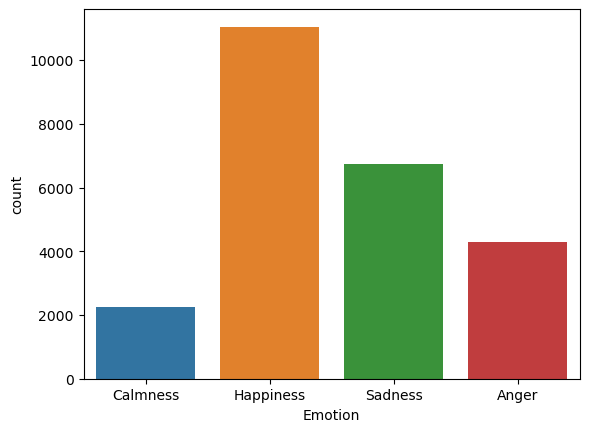

In [10]:
sns.countplot(x='Emotion',data=df);

In [11]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [12]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [13]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [14]:
#splitting the data 
X = df['Clean_Text']
y = df['Emotion']

In [15]:
#  Split Data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [17]:
#logesstic regression pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
pipe_l = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [18]:
# from sklearn.naive_bayes import MultinomialNB
pipe_l.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [20]:
# Check Accuracy score
pipe_l.score(x_test,y_test)

0.7135416666666666

In [27]:
# Make A Prediction
example1 = "This book make me really furious"
pipe_l.predict([example1])

array(['Anger'], dtype=object)

In [29]:
import pickle
with open("emotion_classifier.pkl", "wb") as pipeline_file:
    pickle.dump(pipe_l, pipeline_file)